In [1]:
from qwak.qwak import QWAK
from utils.plotTools import searchProbStepsPlotting

import networkx as nx
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from math import sqrt, ceil, pow
import scipy.special as sp
from scipy.linalg import expm
import sympy as simp

# Grover's Algorithm

In [110]:
def init(N):
    psi0 = np.ones((N,1))/ np.sqrt(N)
    return psi0

def oracle(N,marked):
    oracle = np.eye(N)
    for mark in marked:
        oracle[mark][mark] = -1
    return oracle

def diffusion(N):
    ketSuper = np.ones((N,1))/ np.sqrt(N)
    diff = 2 * np.outer(ketSuper,ketSuper) - np.eye(N)
    return diff

def unitary(N,marked):
    orac = oracle(N,marked)
    diff = diffusion(N)
    return np.dot(diff,orac)

def spaceGen(N):
    stepVec = []
    tVec = []
    for n in N:
        idealSteps = np.floor((np.pi/4)*np.sqrt(n))
        stepVec.append(int(idealSteps))
    return stepVec

def groverSimpleSearch(N,steps,marked):
    u = unitary(N,marked)
    prob = []
    psiN = init(N)
    for i in range(0,steps):
        psiN = np.dot(u,psiN)
    return np.absolute(psiN**2)

def groverSearch(N,stepSpace,marked):
    prob = []
    probT = []
    for n,steps in zip(N,stepSpace):
        u = unitary(n,marked)
        psiN=init(n)
        prob += [np.absolute(psiN[marked][0][0])**2]
        for step in range(1,steps+1):
            psiN = np.dot(u,psiN)
            prob+=[np.absolute(psiN[marked][0][0]**2)]
        probT.append(prob)
        prob = []
    return probT

## Single element Grover Search

11


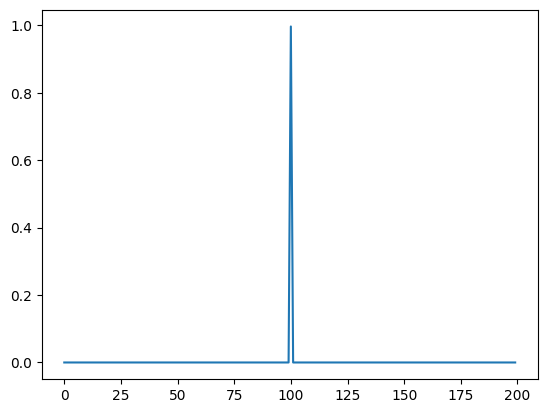

In [3]:
# n=[200]
n=200
# steps = spaceGen(n)
steps = int(np.floor((np.pi/4) * np.sqrt(n)))
print(steps)
marked = [n//2]
# grover = groverSearch(n,steps,marked)[0]
groverSingleElement = groverSimpleSearch(n,steps,marked)

plt.plot(groverSingleElement)

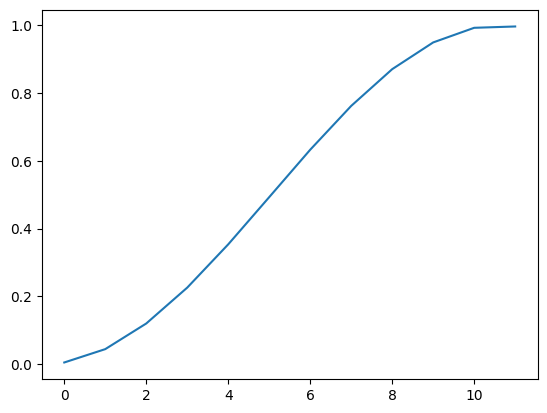

In [4]:
n=[200]
steps = spaceGen(n)
marked = [n[0]//2]
groverSingleElement2 = groverSearch(n,steps,marked)[0]
plt.plot(groverSingleElement2)

## Multiple element Grover Search

6


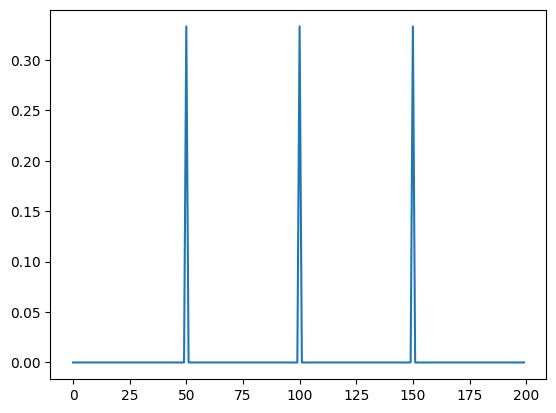

In [5]:
# n=[200]
n=200
# steps = spaceGen(n)
marked = [n//2-n//4,n//2,n//2+n//4]
steps = int(np.floor((np.pi/4) * np.sqrt(n/len(marked))))
print(steps)
# grover = groverSearch(n,steps,marked)[0]
groverMultipleElement = groverSimpleSearch(n,steps,marked)

plt.plot(groverMultipleElement)

## Single Shot Grover Search

1


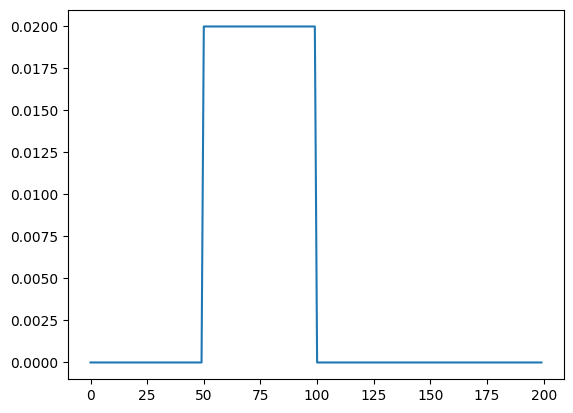

In [106]:
# n=[200]
n=200
# steps = spaceGen(n)
marked = [x for x in range(n//4,n//2)]
steps = int(np.floor((np.pi/4) * np.sqrt(n/len(marked))))
print(steps)
# grover = groverSearch(n,steps,marked)[0]
groverSingleShot = groverSimpleSearch(n,steps,marked)

plt.plot(groverSingleShot)

# CTQW Search

## Single element CTQW Search

In [6]:
n=50
t = (np.pi/2) * np.sqrt(n)
# t=0
gamma = 1/n
initCond = list(range(0,n))
graph = nx.complete_graph(n)

qw = QWAK(graph=graph,markedElements=[(n//2,-1)],laplacian=True)
qw.runWalk(time=t,gamma=gamma,initStateList=initCond)

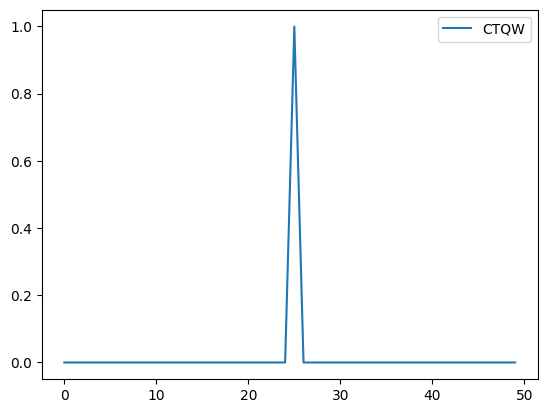

In [7]:
plt.plot(qw.getProbVec(),label='CTQW')
plt.legend()

# Multiple element Grover Search

In [76]:
n=50
markedSearch = [(n//2,-1),(n//2+1,-1)]
t = (np.pi/2) * np.sqrt(n/len(markedSearch))
gamma = 1/n
initCond = list(range(0,n))
graph = nx.complete_graph(n)

qw = QWAK(graph=graph,markedElements=markedSearch,laplacian=True)
qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
prob=0
for element in markedSearch:
    prob+= qw.getProbVec()[element[0]]
print(prob)
print(qw.getProbVec().tolist())

0.9999999999999998
[1.0219925930692414e-30, 2.8486171476462523e-31, 6.937780193591972e-31, 7.762439321654296e-31, 6.663335176516793e-31, 8.44000555021402e-31, 8.04413666867631e-31, 8.346424915142812e-31, 9.016972031834909e-31, 8.413192994269509e-31, 7.37786270904831e-31, 7.838543647112971e-31, 8.413192994269507e-31, 9.045108664616186e-31, 8.725171075768705e-31, 7.636802485438403e-31, 9.387442712231023e-31, 8.24037839757998e-31, 8.684026892698966e-31, 7.293023990365285e-31, 7.966587895759338e-31, 8.306544623599066e-31, 8.905027353817404e-31, 8.253581550128418e-31, 7.293023990365283e-31, 0.4999999999999999, 0.4999999999999999, 7.365697753110517e-31, 8.253581550128413e-31, 7.173104758671792e-31, 7.889580790639227e-31, 7.624321556619114e-31, 7.317188392636266e-31, 7.81311535331598e-31, 7.762439321654285e-31, 7.173104758671791e-31, 6.753853883902998e-31, 8.38644062363575e-31, 7.256890234416486e-31, 7.4880243972344905e-31, 7.054690159747362e-31, 7.268919773405063e-31, 7.87679893526613e-31, 8

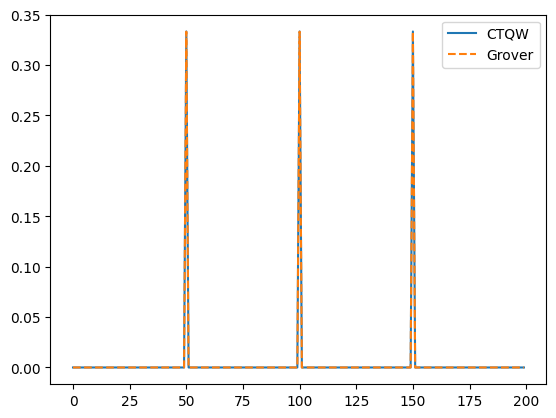

In [100]:
plt.plot(qw.getProbVec(),label='CTQW')
plt.plot(groverMultipleElement,label='Grover',linestyle='dashed')
plt.legend()

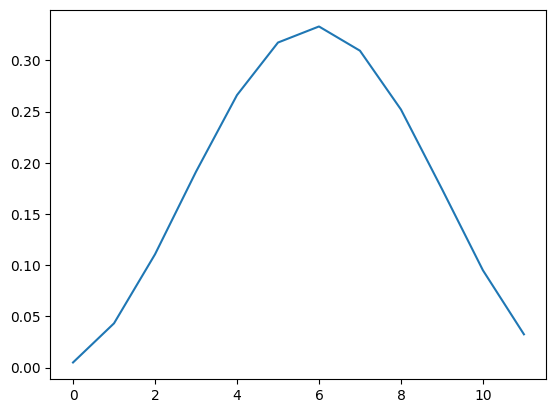

In [119]:
n=[200]
steps = spaceGen(n)
marked = [n[0]//2-n[0]//4,n[0]//2,n[0]//2+n[0]//4]
groverMultipleElement2 = groverSearch(n,steps,marked)[0]

plt.plot(groverMultipleElement2)

# Single Shot Grover

In [4]:
k = 6
n=  200
markedSearch = [(x,-1) for x in range(n//4,n//2)]

t = (np.pi/2) * np.sqrt(n/len(markedSearch))
print(t)
gamma = 1/n
initCond = list(range(0,n))
graph = nx.complete_graph(n)

qw = QWAK(graph=graph,markedElements=markedSearch,laplacian=True)
qw.runWalk(time=t,gamma=gamma,initStateList=initCond)

3.141592653589793


# Other Experiments

## Probability vs number of steps as a function of #marked elements

In [116]:
n=200
# markedSearch = [(n//2,-1),(n//2+1,-1)]
markedSearch = [(x,-1) for x in range(1,n//16)]
t = (np.pi/2) * np.sqrt(n/len(markedSearch))
print(t)
gamma = 1/n
initCond = list(range(0,n))
graph = nx.complete_graph(n)

timeList = [ x for x in np.linspace(0,t,50)]

qw = QWAK(graph=graph,markedElements=markedSearch,laplacian=True)
qw.runMultipleWalks(timeList=timeList,gamma=gamma,initStateList=initCond)
markedProbList = searchProbStepsPlotting(qw)

6.69789804242867


In [117]:
n= 200
# markedSearch = [(n//2,-1),(n//2+1,-1)]
markedSearch2 = [(x,-1) for x in range(1,n//8)]

t = (np.pi/2) * np.sqrt(n/len(markedSearch2))
print(t)
gamma = 1/n
initCond = list(range(0,n))
graph = nx.complete_graph(n)

timeList2 = [ x for x in np.linspace(0,t,50)]

qw2 = QWAK(graph=graph,markedElements=markedSearch2,laplacian=True)
qw2.runMultipleWalks(timeList=timeList2,gamma=gamma,initStateList=initCond)
markedProbList2 = searchProbStepsPlotting(qw2)

4.534498410585545


In [118]:
n=200
# markedSearch = [(n//2,-1),(n//2+1,-1)]
markedSearch3 = [(x,-1) for x in range(1,n//4)]

t = (np.pi/2) * np.sqrt(n/len(markedSearch3))
print(t)
gamma = 1/n
initCond = list(range(0,n))
graph = nx.complete_graph(n)

timeList3 = [ x for x in np.linspace(0,t,50)]

qw3 = QWAK(graph=graph,markedElements=markedSearch3,laplacian=True)
qw3.runMultipleWalks(timeList=timeList3,gamma=gamma,initStateList=initCond)
markedProbList3 = searchProbStepsPlotting(qw3)

3.1734878129702615


[0.24499999999999877, 0.24577561423674693, 0.24809926978172334, 0.25196141823587154, 0.2573461892027652, 0.26423145550347127, 0.27258892410187546, 0.28238425236683545, 0.29357718919341885, 0.3061217404033287, 0.3199663577448449, 0.3350541507156502, 0.35132312033810614, 0.3687064139263513, 0.38713259979832654, 0.40652596080387937, 0.4268068054627746, 0.447891795434083, 0.46969428797129414, 0.49212469195595443, 0.5150908360467826, 0.5384983474314886, 0.5622510396248965, 0.5862513077198475, 0.6104005294666969, 0.6345994705332966, 0.658748692280147, 0.6827489603750966, 0.706501652568506, 0.7299091639532114, 0.7528753080440397, 0.7753057120286998, 0.7971082045659125, 0.8181931945372196, 0.8384740391961154, 0.8578674002016681, 0.876293586073643, 0.8936768796618875, 0.9099458492843437, 0.9250336422551508, 0.9388782595966652, 0.9514228108065772, 0.962615747633158, 0.9724110758981193, 0.9807685444965238, 0.9876538107972299, 0.9930385817641246, 0.9969007302182717, 0.9992243857632472, 0.999999999

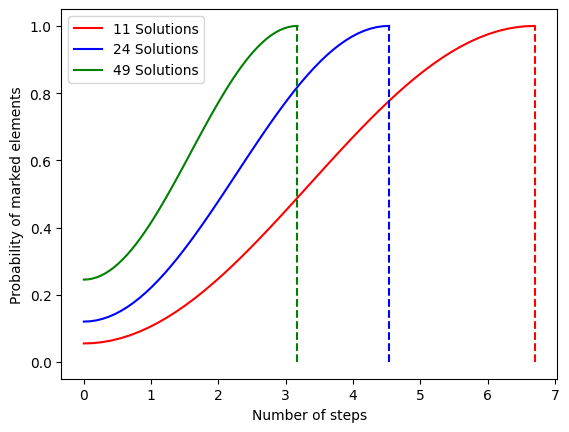

In [123]:
def plotSearch(N,probT,tSpace,configVec):
    plotName = ""
    for T,walk,config,n in zip(tSpace,probT,configVec,N):
        #print(config)
        plt.plot(T,walk,color=config[0],linestyle=config[1],label="N=%s"%n)
        plt.vlines(max(T),0,1,color=config[0],linestyle=config[2])
        plt.legend()
        plt.xlabel("Number of steps")
        plt.ylabel("Probability of marked elements")
    for n in N:
        plotName+='_'+str(n)
    plt.savefig(r"C:\Users\jaime\Documents\GitHub\QWAK\Notebook\Output\\"+f"Search{plotName}")
    # plt.clf()
    
def plotSearch2(markedList,probT,tSpace,configVec):
    plotName = ""
    for T,walk,config,marked in zip(tSpace,probT,configVec,markedList):
        plt.plot(T,walk,color=config[0],linestyle=config[1],label=f"{len(marked)} Solutions")
        plt.vlines(max(T),0,1,color=config[0],linestyle=config[2])
        plt.legend()
        plt.xlabel("Number of steps")
        plt.ylabel("Probability of marked elements")
    for marked in markedList:
        plotName+='_'+str(len(marked))
    plt.savefig(r"C:\Users\jaime\Documents\GitHub\QWAK\Notebook\Output\\"+f"Search{plotName}")
    # plt.clf()
colors = ['r','b','g','k']
lines = ['-','-','-','-']
lines2 = ['--','--','--','--']
configVec = zip(colors,lines,lines2)

print(markedProbList3)
# plotSearch([200,100,50],[markedProbList,markedProbList2,markedProbList3],[timeList,timeList2,timeList3],configVec)
plotSearch2([markedSearch,markedSearch2,markedSearch3],[markedProbList,markedProbList2,markedProbList3],[timeList,timeList2,timeList3],configVec)


## Multiple single element searches

In [7]:
numberOfWalks = 4
minWalkSize = 3
nList = [2**x for x in range(minWalkSize,numberOfWalks+minWalkSize)]

tList = [(np.pi/2) * np.sqrt(x) for x in nList]

gammaList = [1/x for x in nList]

markedSearchList =[[(x//2,-1)] for x in nList]


qwakList = []

for (t,markedSearch,n,gamma) in zip(tList,markedSearchList,nList,gammaList):
    graph = nx.complete_graph(n)
    qw = QWAK(graph=graph,markedSearch=markedSearch,laplacian=True)
    initCond = list(range(0,n))
    qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
    qwakList.append(qw)


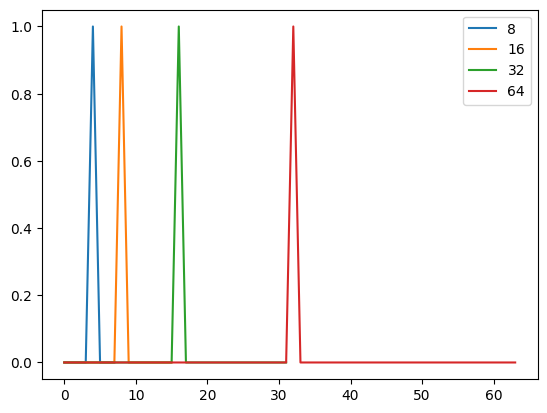

In [8]:
for qwak in qwakList:
    plt.plot(qwak.getProbVec(),label=f"{qwak.getDim()}")
plt.legend()

## Various multiple element searches

In [22]:
numberOfWalks = 5
minWalkSize = 3
nList = [2**x for x in range(minWalkSize,numberOfWalks+minWalkSize)]


gammaList = [1/x for x in nList]

nMarkedElements = 3
markedSearchList =[[(x//2+k,-1) for k in range(0,nMarkedElements)] for x in nList]

tList = [(np.pi/2) * np.sqrt(x/nMarkedElements) for x in nList]

qwakList = []

for (t,markedSearch,n,gamma) in zip(tList,markedSearchList,nList,gammaList):
    graph = nx.complete_graph(n)
    qw = QWAK(graph=graph,markedSearch=markedSearch,laplacian=True)
    initCond = list(range(0,n))
    qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
    print(f"qwakSize:{qw.getDim()}\t qwakTime:{qw.getTime()}")
    qwakList.append(qw)


qwakSize:8	 qwakTime:2.565099660323728
qwakSize:16	 qwakTime:3.6275987284684352
qwakSize:32	 qwakTime:5.130199320647456
qwakSize:64	 qwakTime:7.2551974569368705
qwakSize:128	 qwakTime:10.260398641294913


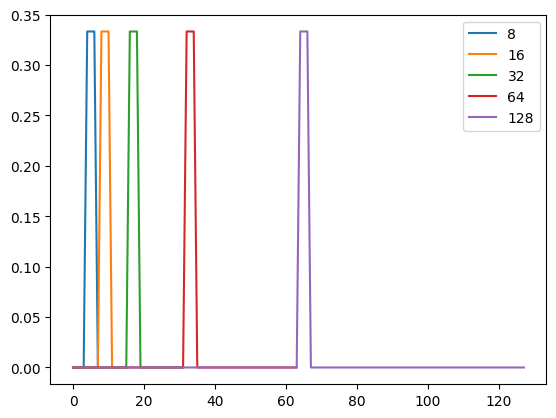

In [23]:
for qwak in qwakList:
    plt.plot(qwak.getProbVec(),label=f"{qwak.getDim()}")
    
plt.legend()

## Multiple Single Shot Grover searches

In [61]:
numberOfWalks = 5
minWalkSize = 3
nList = [2**x for x in range(minWalkSize,numberOfWalks+minWalkSize)]


gammaList = [1/x for x in nList]

nMarkedElementsList = [x//4 for x in nList]
print(nMarkedElementsList)

markedSearchListAux = []
markedSearchList =[]
# markedSearchList =[[(x//4+k,-1) for k in range(y) ] for x,y in zip(nList,nMarkedElementsList)]
for x,n in zip(nMarkedElementsList,nList):
    for k in range(x):
        markedSearchListAux.append((n//4+k,-1))
        
    markedSearchList.append(markedSearchListAux)
    markedSearchListAux = []
    
print(len(markedSearchList))
tList = [(np.pi/2) * np.sqrt(x/len(y)) for x,y in zip(nList,markedSearchList)]

qwakList = []

for (t,markedSearch,n,gamma) in zip(tList,markedSearchList,nList,gammaList):
    graph = nx.complete_graph(n)
    qw = QWAK(graph=graph,markedSearch=markedSearch,laplacian=True)
    initCond = list(range(0,n))
    qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
    print(f"qwakSize:{qw.getDim()}\t qwakTime:{qw.getTime()}")
    qwakList.append(qw)


[2, 4, 8, 16, 32]
5
qwakSize:8	 qwakTime:3.141592653589793
qwakSize:16	 qwakTime:3.141592653589793
qwakSize:32	 qwakTime:3.141592653589793
qwakSize:64	 qwakTime:3.141592653589793
qwakSize:128	 qwakTime:3.141592653589793


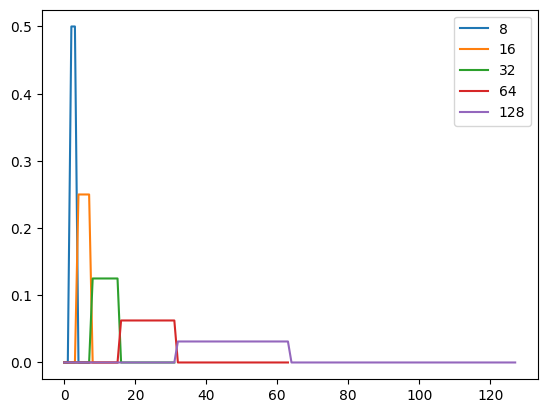

In [ ]:
for qwak in qwakList:
    plt.plot(qwak.getProbVec(),label=f"{qwak.getDim()}")
    
plt.legend()

## Searching in a Hypercube

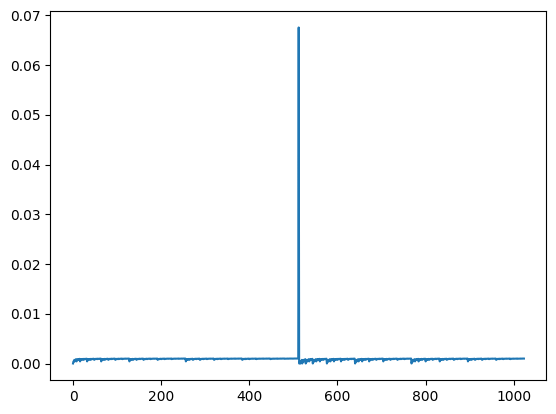

In [58]:
n=10
graph = nx.hypercube_graph(n)
gamma = 2/n + (1/(n**2))
gamma = 0 
for r in range(1,n):
    gamma+=math.factorial(n) / ( r * 2**n * math.factorial(r)*math.factorial(n-r))
    
N = len(graph)
markedElements = [(N//2,-1)]
# markedElements = [(N//2,-1),(N//4,-1)]
t = (np.pi/(2+(1/n))) * np.sqrt(N/len(markedElements))
initCond = list(range(0,len(graph)))


qw = QWAK(graph=graph,markedElements=markedElements,laplacian=True)
qw.runExpmWalk(time=t,gamma=gamma,initStateList=initCond)
plt.plot(qw.getProbVec())

In [56]:
def taylor_series_approximation(n, num_terms):
    approx = 0
    for i in range(num_terms):
        approx += ((-1)**i) * (n**(-2*i-2)) / math.factorial(2*i+2)
    return approx

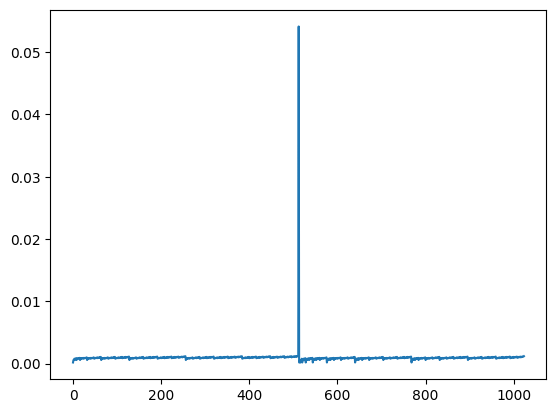

In [57]:
n=10
graph = nx.hypercube_graph(n)
gamma = 2/n + taylor_series_approximation(n, 85)
# gamma = 0
# import math
# x = 0 
# for r in range(n,n):
    # gamma+=math.factorial(n) / ( r * 2**n * math.factorial(r)*math.factorial(n-r))

N = len(graph)
markedElements = [(N//2,-1)]
# markedElements = [(N//2,-1),(N//4,-1)]
# t = (np.pi/(2+2*(1/n))) * np.sqrt(N/len(markedElements))
# t = (np.pi/(2+(1/n))) * np.sqrt(len(graph))
t = np.pi/2 * sqrt(N)
# t = (np.pi/2) * np.sqrt(len(graph))
initCond = list(range(0,len(graph)))


qw = QWAK(graph=graph,markedElements=markedElements,laplacian=True)
qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
# print(qw.getOperator())
plt.plot(qw.getProbVec())

In [18]:
import math
x = 0 
for r in range(1,n):
    x+=math.factorial(n) / ( r * 2**n * math.factorial(r)*math.factorial(n-r))
    
print(x)

0.22878805493551588
